<a href="https://colab.research.google.com/github/poorvautturkar25/Ann/blob/main/23uam135_exp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

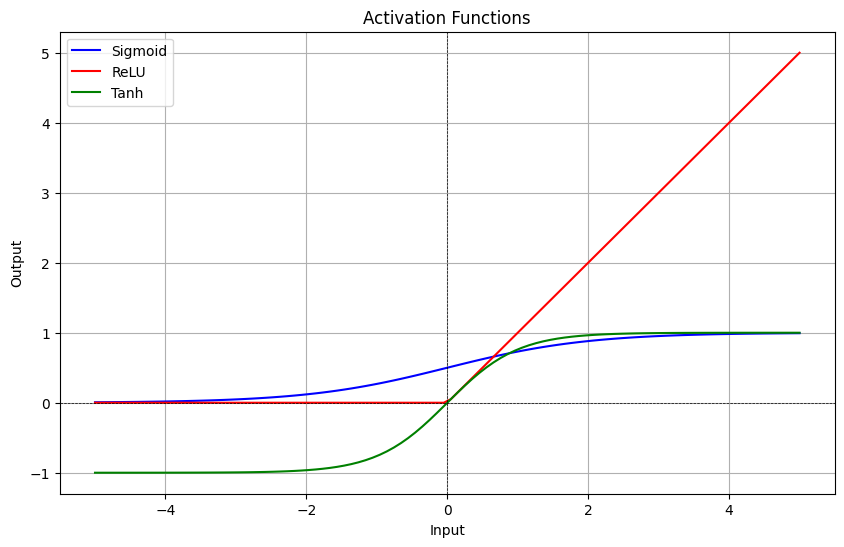

Sigmoid: Smooth, bounded between (0,1), suffers from vanishing gradients.
ReLU: Zero for negative values, unbounded for positive values, avoids vanishing gradients but has dead neurons issue.
Tanh: Smooth, bounded between (-1,1), stronger gradients than sigmoid.


In [ ]:
#Implementation of Activation Functions: Sigmoid,ReLU, and Tanh in Neural Networks

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

x = np.linspace(-5, 5, 100)

y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

plt.figure(figsize=(10, 6))

plt.plot(x, y_sigmoid, label='Sigmoid', color='blue')
plt.plot(x, y_relu, label='ReLU', color='red')
plt.plot(x, y_tanh, label='Tanh', color='green')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()

print("Sigmoid: Smooth, bounded between (0,1), suffers from vanishing gradients.")
print("ReLU: Zero for negative values, unbounded for positive values, avoids vanishing gradients but has dead neurons issue.")
print("Tanh: Smooth, bounded between (-1,1), stronger gradients than sigmoid.")





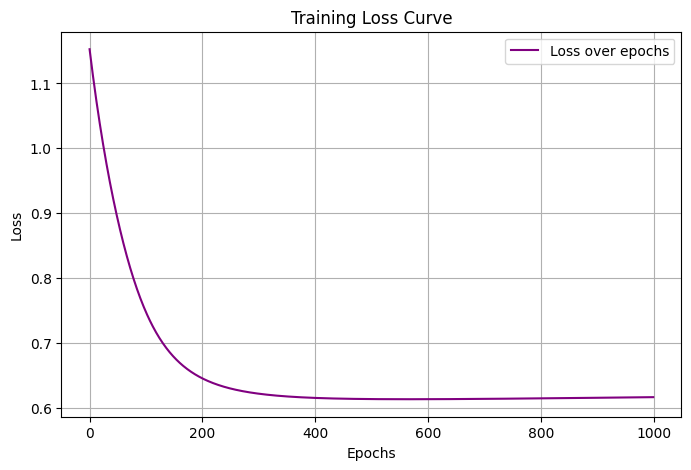

Final Weights: W=12.0963, b=-7.1101


In [ ]:
# 1. Student Performance Prediction Problem Statement: Predict a student’s final exam score based on the number of hours they
#study daily. Implement a single-layer neural network using Gradient Descent, applying different
# activation functions (Sigmoid, ReLU, and Tanh) to study their effect on model training and
# accuracy.

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
   return np.tanh(x)


np.random.seed(0)
study_hours = np.random.uniform(1, 10, 100)
exam_scores = 5 * study_hours + np.random.normal(0, 5, 100)

study_hours = (study_hours - np.mean(study_hours)) / np.std(study_hours)
exam_scores = (exam_scores - np.mean(exam_scores)) / np.std(exam_scores)

W = np.random.randn()
b = np.random.randn()
learning_rate = 0.01
epochs = 1000

def activation(x, func='sigmoid'):
    if func == 'sigmoid':
        return sigmoid(x)
    elif func == 'relu':
        return relu(x)
    elif func == 'tanh':
        return tanh(x)
    else:
        raise ValueError("Unsupported activation function")

losses = []
for epoch in range(epochs):
    y_pred = activation(W * study_hours + b, func='sigmoid')
    loss = np.mean((y_pred - exam_scores) ** 2)
    losses.append(loss)

    dW = np.mean(2 * (y_pred - exam_scores) * study_hours)
    db = np.mean(2 * (y_pred - exam_scores))

    W -= learning_rate * dW
    b -= learning_rate * db

plt.figure(figsize=(8, 5))
plt.plot(range(epochs), losses, label='Loss over epochs', color='purple')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid()
plt.show()

print(f"Final Weights: W={W:.4f}, b={b:.4f}")

Iteration 0, Cost: 76.51515151515152
Iteration 10, Cost: 76.51515151515152
Iteration 20, Cost: 76.51515151515152
Iteration 30, Cost: 76.51515151515152
Iteration 40, Cost: 76.51515151515152
Iteration 50, Cost: 76.51515151515152
Iteration 60, Cost: 76.51515151515152
Iteration 70, Cost: 76.51515151515152
Iteration 80, Cost: 76.51515151515152
Iteration 90, Cost: 76.51515151515152


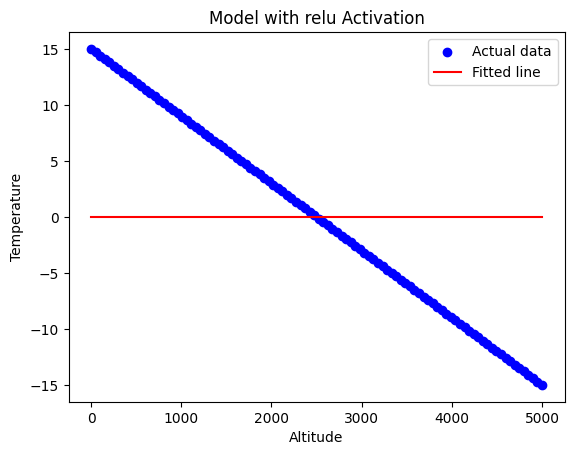

In [ ]:
#2. Temperature Prediction
# Problem Statement: Model the relationship between altitude and temperature in a mountainous
# region. Use Gradient Descent to analyze a dataset of altitude levels (independent variable) and
# corresponding temperatures (dependent variable). Experiment with activation functions to
# evaluate how they impact the learning process and accuracy of predictions.

import numpy as np
import matplotlib.pyplot as plt

# data (altitude and temperature)
altitude = np.linspace(0, 5000, 100)  # Altitude levels from 0 to 5000 meters
temperature = 15 - 0.006 * altitude  # A simple linear relationship for temperature

# Normalize the data (optional)
altitude = altitude.reshape(-1, 1)
temperature = temperature.reshape(-1, 1)

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Hyperparameters
learning_rate = 0.01
iterations = 100
m = len(altitude)  # Number of data points

# Initialize parameters
w = np.random.randn()
b = np.random.randn()

# Choose an activation function (try sigmoid, relu, or tanh)
activation_function = relu  # You can switch this to sigmoid() or tanh()

# Gradient Descent
for i in range(iterations):
    # Apply the activation function to the prediction
    y_pred = activation_function(w * altitude + b)

    # Compute the cost (MSE)
    cost = (1/m) * np.sum((y_pred - temperature) ** 2)

    # Compute gradients
    dw = (2/m) * np.sum((y_pred - temperature) * altitude)
    db = (2/m) * np.sum(y_pred - temperature)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Optionally print the cost every 100 iterations
    if i % 10 == 0:
        print(f"Iteration {i}, Cost: {cost}")

# Plotting the results
plt.scatter(altitude, temperature, color='blue', label='Actual data')
plt.plot(altitude, activation_function(w * altitude + b), color='red', label='Fitted line')
plt.xlabel('Altitude')
plt.ylabel('Temperature')
plt.legend()

activation_function_name = activation_function.__name__
plt.title(f"Model with {activation_function_name} Activation")
plt.show()

Iteration 0, Cost: 1.3824070596295615
Iteration 100, Cost: 0.7368670293658232
Iteration 200, Cost: 0.6519082911681886
Iteration 300, Cost: 0.6314173972387798
Iteration 400, Cost: 0.6257434457567848
Iteration 500, Cost: 0.6245930555227678
Iteration 600, Cost: 0.6248105831543178
Iteration 700, Cost: 0.6253658248493258
Iteration 800, Cost: 0.6259452359235084
Iteration 900, Cost: 0.6264724564066294
Iteration 0, Cost: 0.9784396718493922
Iteration 100, Cost: 0.7000190165585848
Iteration 200, Cost: 0.7513151039949442
Iteration 300, Cost: 0.8502820247206675
Iteration 400, Cost: 0.9480688692810603
Iteration 500, Cost: 1.0372243683780498
Iteration 600, Cost: 1.1369164439675614
Iteration 700, Cost: 1.249941547557099
Iteration 800, Cost: 1.3768028042123663
Iteration 900, Cost: 1.517343308504616
Iteration 0, Cost: 1.5884835467169687
Iteration 100, Cost: 0.2476001753192668
Iteration 200, Cost: 0.168725479337055
Iteration 300, Cost: 0.1571511093855801
Iteration 400, Cost: 0.15638844725458667
Iteratio

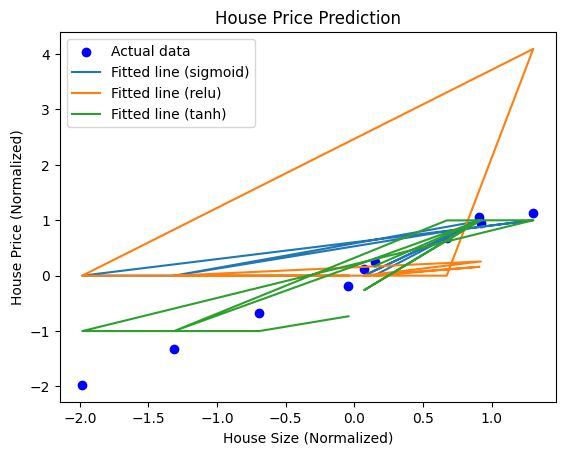

In [ ]:
#3. House Price Prediction
# Problem Statement: Predict the price of a house based on its size in square feet. Implement a
# neural network model using Gradient Descent to determine the relationship between house size
# (independent variable) and house price (dependent variable). Compare the performance of
# different activation functions to find the most suitable for this regression problem.


import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
house_sizes = np.random.randint(100, 500, size=10)
house_prices = 100 * house_sizes + np.random.randn(len(house_sizes)) *1000

# Normalize data
house_sizes = (house_sizes - np.mean(house_sizes)) / np.std(house_sizes)
house_prices = (house_prices - np.mean(house_prices)) / np.std(house_prices)

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Gradient Descent
def gradient_descent(X, y, activation_function, learning_rate=0.01, iterations=1000):
    m = len(X)
    w = np.random.randn()
    b = np.random.randn()

    for i in range(iterations):
        y_pred = activation_function(w * X + b)
        cost = (1/m) * np.sum((y_pred - y) ** 2)

        dw = (2/m) * np.sum((y_pred - y) * X)
        db = (2/m) * np.sum(y_pred - y)

        w -= learning_rate * dw
        b -= learning_rate * db

        if i % 100== 0:
            print(f"Iteration {i}, Cost: {cost}")

    return w, b

# Train and compare
activation_functions = [sigmoid, relu, tanh]
results = {}

learning_rate ={
    sigmoid:0.01,
    relu:0.001,
    tanh:0.01
}

for activation_function in activation_functions:
    w, b = gradient_descent(house_sizes, house_prices, activation_function)
    results[activation_function.__name__] = (w, b)
# Plotting the results
plt.scatter(house_sizes, house_prices, color='blue', label='Actual data')

for activation_name, (w, b) in results.items():
    # Use activation_name directly instead of globals()[activation_name]
    plt.plot(house_sizes, activation_functions[activation_functions.index(globals()[activation_name])](w * house_sizes + b), label=f'Fitted line ({activation_name})')

plt.xlabel('House Size (Normalized)')
plt.ylabel('House Price (Normalized)')
plt.legend()
plt.title('House Price Prediction')
plt.show()
